In [1]:
!pip install nltk

In [2]:
!pip install -q wordcloud
import wordcloud
import nltk
nltk.download('stopwords')
nltk.download('wordnet')#GIVE THE MEANING FOR WORDS
nltk.download('punkt')#generate senteces using unsupervised learning
nltk.download('averaged_perceptron_tagger')#statstical part of  speech

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [3]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Importing the warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Loading the dataset
df = pd.read_csv("spam.csv",encoding='latin-1')
print(df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham              Will Ã¼ b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [5]:
df.head()


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
#Checking information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
#Checking the shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (5572, 2)


In [8]:
#Checking for the null values
df.isnull().values.any()

np.False_

In [9]:
#Checkin for the null values in columns
df.isnull().sum()

,0
Category,0
Message,0


In [10]:
# Check the column names
print(df.columns)


Index(['Category', 'Message'], dtype='object')


In [11]:
# Note: Here in our dataset, 1 stands for Spam mail and 0 stands for not a spam mail.
# Checking the Ratio of labels
# Replace 'label' with the actual column name, e.g., 'Category_spamham'
# Calculate and print Not a Spam Email (Ham) ratio# Calculate and print Not a Spam Email (Ham) ratio
not_spam_ratio = round(len(df[df['Category'] == 'ham']) / len(df['Category']) * 100, 2)
print("Not a Spam Email Ratio (Ham):", str(not_spam_ratio) + "%")

# Calculate and print Spam Email ratio
spam_ratio = round(len(df[df['Category'] == 'spam']) / len(df['Category']) * 100, 2)
print("Spam Email Ratio:", str(spam_ratio) + "%")



Not a Spam Email Ratio (Ham): 86.59%
Spam Email Ratio: 13.41%


In [12]:
#Creating the new column for length of message column
df['length'] = df['Message'].str.len()
df.head()

,Category,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
# Converting all messages to lower case
df['Message'] = df['Message'].str.lower()
df.head()

,Category,Message,length
0,ham,"go until jurong point, crazy.. available only ...",111
1,ham,ok lar... joking wif u oni...,29
2,spam,free entry in 2 a wkly comp to win fa cup fina...,155
3,ham,u dun say so early hor... u c already then say...,49
4,ham,"nah i don't think he goes to usf, he lives aro...",61


In [14]:
# Replace email addresses with 'project123@gmail.com'
df['Message'] = df['Message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'medamanooridhanush@karunya.edu.in', regex=True)

# Replace URLs with 'https://mail.google.com/mail/u/0/#spam'
df['Message'] = df['Message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'https://mail.google.com/mail/u/0/#spam', regex=True)

# Replace currency symbols with 'dollers'
df['Message'] = df['Message'].str.replace(r'£|\$', 'dollers', regex=True)

# Replace 10-digit phone numbers with '9849326465'
df['Message'] = df['Message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', '9849326465', regex=True)

# Replace numeric characters with 'numbr'
df['Message'] = df['Message'].str.replace(r'\d+(\.\d+)?', 'numbr', regex=True)


In [15]:
# Remove punctuation
df['Message'] = df['Message'].str.replace(r'[^\w\d\s]', ' ', regex=True)

# Replace whitespace between terms with a single space
df['Message'] = df['Message'].str.replace(r'\s+', ' ', regex=True)

# Remove leading and trailing whitespace
df['Message'] = df['Message'].str.strip()

In [16]:
# now re-checking the data
df.head()

,Category,Message,length
0,ham,go until jurong point crazy available only in ...,111
1,ham,ok lar joking wif u oni,29
2,spam,free entry in numbr a wkly comp to win fa cup ...,155
3,ham,u dun say so early hor u c already then say,49
4,ham,nah i don t think he goes to usf he lives arou...,61


In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
import string
import nltk
from nltk.corpus import stopwords #ntlk corpus - dataset

# Ensure stopwords are downloaded
nltk.download('stopwords')

# Create a set of stopwords
stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

# Remove stopwords from the 'Message' column
df['Message'] = df['Message'].apply(lambda x: " ".join(term for term in x.split() if term not in stop_words))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# Create a new column (clean_length) after punctuation and stopwords removal
df['clean_length'] = df['Message'].str.len()
# Display the DataFrame
df.head()

,Category,Message,length,clean_length
0,ham,go jurong point crazy available bugis n great ...,111,82
1,ham,ok lar joking wif oni,29,21
2,spam,free entry numbr wkly comp win fa cup final tk...,155,139
3,ham,dun say early hor c already say,49,31
4,ham,nah think goes usf lives around though,61,38


In [20]:
#Total length removal
print("Original Length:",df.length.sum())
print("Cleaned Length:",df.clean_length.sum())
print("Total Words Removed:",(df.length.sum()) - (df.clean_length.sum()))

Original Length: 448516
Cleaned Length: 302406
Total Words Removed: 146110


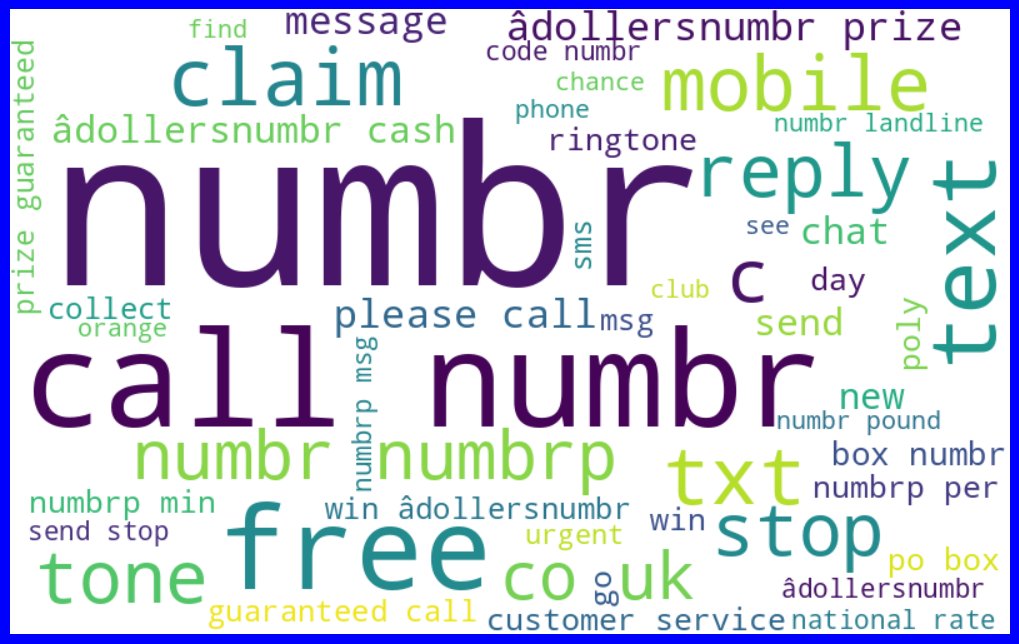

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Filter spam messages using the correct column name
spams = df['Message'][df['Category'] == 'spam']

# Generate a word cloud for spam messages
spam_cloud = WordCloud(width=800, height=500, background_color='white', max_words=50).generate(' '.join(spams))

# Plot the word cloud
plt.figure(figsize=(10, 8), facecolor='b')
plt.imshow(spam_cloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.tight_layout(pad=0)
plt.show()


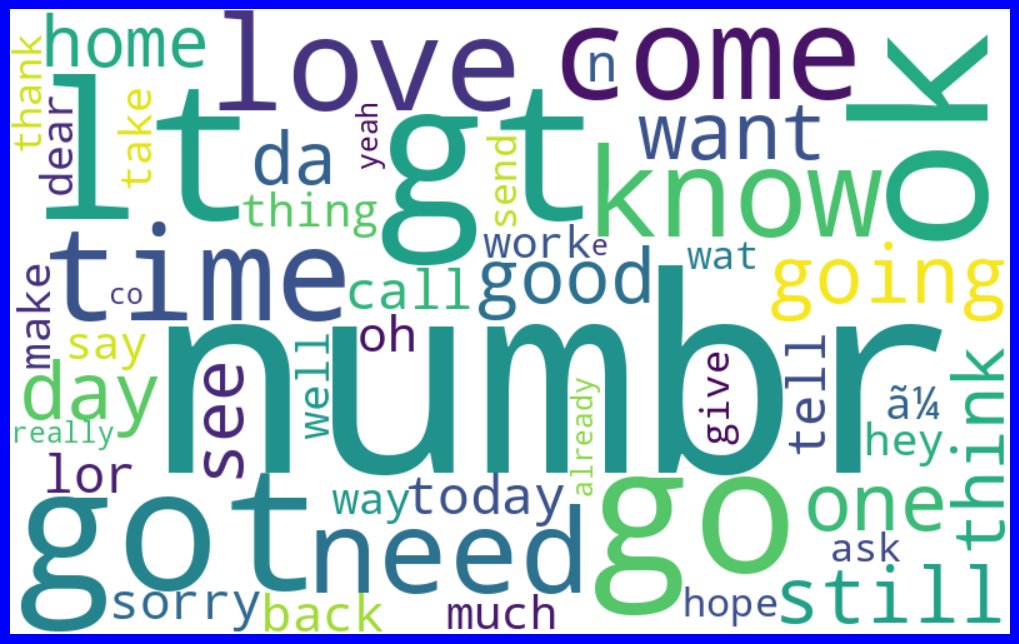

In [22]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Filter not-spam messages using the correct column name
not_spams = df['Message'][df['Category'] == 'ham']  # Assuming 'ham' indicates not-spam

# Generate a word cloud for not-spam messages
not_spam_cloud = WordCloud(width=800, height=500, background_color='white', max_words=50).generate(' '.join(not_spams))

# Plot the word cloud
plt.figure(figsize=(10, 8), facecolor='b')
plt.imshow(not_spam_cloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.tight_layout(pad=0)
plt.show()


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 1. Convert text into vectors using TF-IDF
tf_vec = TfidfVectorizer()

# Transform the messages into TF-IDF feature vectors
features = tf_vec.fit_transform(df['Message'])  # Using 'Message' instead of 'message'

# 2. Instantiate classifiers
naive = MultinomialNB()
svm = SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
decision = DecisionTreeClassifier()
classifier = RandomForestClassifier(n_estimators=10, criterion="entropy")
clf = LogisticRegression()

# 3. Split features and labels
X = features
y = df['Category']  # Assuming 'Category' is the correct label for spam/ham

# Example of splitting the dataset into training and testing sets (optional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can train your models using X_train and y_train


In [24]:
# Train and predict for naive bayes model
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)

#test_size=0.20 random_state=42 test_size=0.15

naive.fit(X_train,Y_train)
y_pred= naive.predict(x_test)



print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.9763101220387652


In [25]:
# Train and predict for SVM model
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)

#test_size=0.20 random_state=42 test_size=0.15
svm.fit(X_train,Y_train)
y_pred = svm.predict(x_test)

print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.9842067480258435


In [26]:
# train and predict for the Decision tree model
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)
decision.fit(X_train,Y_train)
#test_size=0.20 random_state=42 test_size=0.15

y_pred = decision.predict(x_test)
print ('Final score = > ', accuracy_score(y_test,y_pred))



Final score = >  0.9748743718592965


In [27]:
# train and predict uisng random forest classifier
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)
classifier.fit(X_train, Y_train)
#test_size=0.20 random_state=42 test_size=0.15
y_pred= classifier.predict(x_test)
print ('Final score = > ', accuracy_score(y_test,y_pred))

Final score = >  0.9755922469490309


In [28]:
# train and predict uisng logistic regression
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)
clf.fit(X_train, Y_train)
#test_size=0.20 random_state=42 test_size=0.15
y_pred= clf.predict(x_test)
print ('Final score = > ', accuracy_score(y_test,y_pred))


Final score = >  0.968413496051687


In [29]:
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

[Text(0.7388211382113821, 0.9857142857142858, 'x[4539] <= 0.071\ngini = 0.232\nsamples = 4179\nvalue = [3618, 561]'),
 Text(0.5853658536585366, 0.9571428571428572, 'x[4642] <= 0.079\ngini = 0.034\nsamples = 3249\nvalue = [3192, 57]'),
 Text(0.6620934959349594, 0.9714285714285715, 'True  '),
 Text(0.5691056910569106, 0.9285714285714286, 'x[7233] <= 0.098\ngini = 0.028\nsamples = 3238\nvalue = [3192, 46]'),
 Text(0.5365853658536586, 0.9, 'x[1225] <= 0.233\ngini = 0.023\nsamples = 3229\nvalue = [3191, 38]'),
 Text(0.5203252032520326, 0.8714285714285714, 'x[128] <= 0.344\ngini = 0.022\nsamples = 3227\nvalue = [3191, 36]'),
 Text(0.5040650406504065, 0.8428571428571429, 'x[3089] <= 0.126\ngini = 0.021\nsamples = 3225\nvalue = [3191, 34]'),
 Text(0.4878048780487805, 0.8142857142857143, 'x[29] <= 0.098\ngini = 0.02\nsamples = 3223\nvalue = [3191.0, 32.0]'),
 Text(0.4715447154471545, 0.7857142857142857, 'x[6029] <= 0.242\ngini = 0.018\nsamples = 3221\nvalue = [3191.0, 30.0]'),
 Text(0.455284552

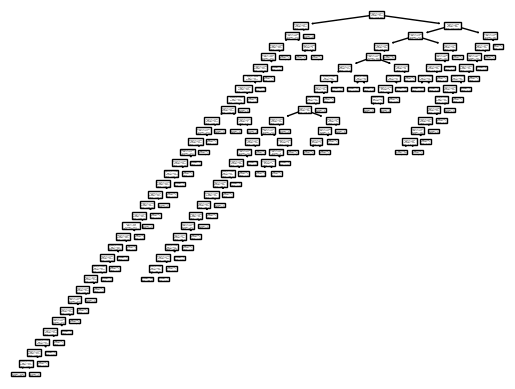

In [30]:
 tree.plot_tree(decision)

In [31]:
# Checking Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1207
        spam       0.97      0.79      0.87       186

    accuracy                           0.97      1393
   macro avg       0.97      0.89      0.93      1393
weighted avg       0.97      0.97      0.97      1393



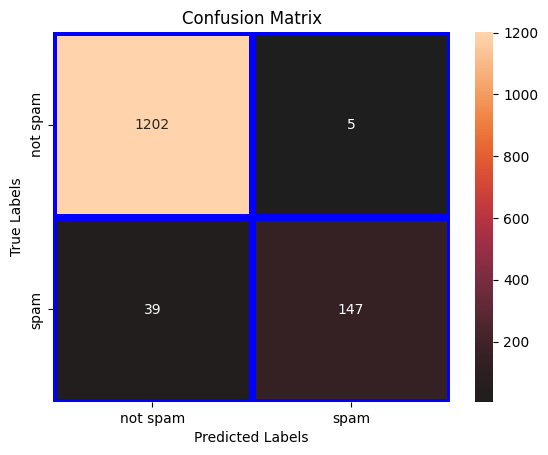

In [32]:
conf_mat = confusion_matrix(y_test,y_pred)

ax = plt.subplot()

sns.heatmap(conf_mat, annot=True, ax=ax, linewidths=5, linecolor='b', center=0, fmt='g')

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['not spam','spam'])
ax.yaxis.set_ticklabels(['not spam','spam'])

plt.show()


In [33]:
# SVM performs best among all the classification models

In [34]:
import pandas as pd

# Create a DataFrame to compare true labels and predicted labels
results = pd.DataFrame({
    'True Label': y_test,
    'Predicted Label': y_pred,
})

# Add the original messages back to the DataFrame (assuming you have access to the original messages)
results['Original Message'] = df.loc[y_test.index, 'Message'].values  # Adjust this if needed

# Display the first few rows of the results DataFrame
print(results.head(10))  # Display the first 10 results for inspection


     True Label Predicted Label  \
3245        ham             ham   
944         ham             ham   
1044        ham             ham   
2484        ham             ham   
812         ham             ham   
2973        ham             ham   
2991        ham             ham   
2942        ham             ham   
230         ham             ham   
1181        ham             ham   

                                       Original Message  
3245  squeeeeeze christmas hug lik frndshp den hug b...  
944   also sorta blown couple times recently id rath...  
1044  mmm thats better got roast iâ b better drinks ...  
2484                     mm kanji eat anything heavy ok  
812   ring comes guys costumes gift future yowifes h...  
2973                  sary need tim bollox hurt lot tol  
2991  love decision feeling could decide love life w...  
2942  supervisor find numbr one lor thk students hav...  
230                                   dear good morning  
1181                              

In [35]:
# Filter for spam messages
spam_results = results[results['Predicted Label'] == 'spam']  # Adjust according to your label naming

# Display the spam results
print(spam_results[['True Label', 'Predicted Label', 'Original Message']])


     True Label Predicted Label  \
401        spam            spam   
5567       spam            spam   
1961       spam            spam   
2664       spam            spam   
1598       spam            spam   
...         ...             ...   
4888       spam            spam   
4759       spam            spam   
1456       spam            spam   
2209       spam            spam   
4127       spam            spam   

                                       Original Message  
401   free ringtone text first numbr poly text get n...  
5567  numbrnd time tried numbr contact âdollersnumbr...  
1961  guess somebody know secretly fancies wanna fin...  
2664  numbr free numbrst week nonumbr nokia tone num...  
1598  urgent mobile number awarded âdollersnumbr pri...  
...                                                 ...  
4888  todays vodafone numbers ending numbr selected ...  
4759  urgent mobile number awarded âdollersnumbr pri...  
1456  summers finally fancy chat flirt sexy singles ...  